### Connecting to the Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Linear Regression**

### Import required libraries:

In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns
from math import sqrt

### Load the dataset:

In [3]:
''' The datset can be downloaded from the following line:
    https://www.kaggle.com/datasets/yukeshmarudhasalam/bankmarketing
'''
df_original=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/AI_ML/BankMarketing.csv',delimiter=';')
df_copy=df_original.copy()

In [4]:
print('\nNumber of rows and columns in the data set: ',df_copy.shape)
print('')
df_copy.head()


Number of rows and columns in the data set:  (41188, 21)



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Description of dataset
df_copy.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Check if NAN values exist in dataset
for col in df_copy.columns : 
    msg = 'columnn : {:>10}\t count of NaN value : {:.0f}'.format(col, 100 * (df_copy[col].isnull().sum() ))
    print(msg)

columnn :        age	 count of NaN value : 0
columnn :        job	 count of NaN value : 0
columnn :    marital	 count of NaN value : 0
columnn :  education	 count of NaN value : 0
columnn :    default	 count of NaN value : 0
columnn :    housing	 count of NaN value : 0
columnn :       loan	 count of NaN value : 0
columnn :    contact	 count of NaN value : 0
columnn :      month	 count of NaN value : 0
columnn : day_of_week	 count of NaN value : 0
columnn :   duration	 count of NaN value : 0
columnn :   campaign	 count of NaN value : 0
columnn :      pdays	 count of NaN value : 0
columnn :   previous	 count of NaN value : 0
columnn :   poutcome	 count of NaN value : 0
columnn : emp.var.rate	 count of NaN value : 0
columnn : cons.price.idx	 count of NaN value : 0
columnn : cons.conf.idx	 count of NaN value : 0
columnn :  euribor3m	 count of NaN value : 0
columnn : nr.employed	 count of NaN value : 0
columnn :          y	 count of NaN value : 0


In [7]:
# Extract columns with data type object
obj_column = df_copy.dtypes[df_copy.dtypes == 'object'].index
df_copy[obj_column[2]].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [8]:
# Extract unique values of each column of data type object 
for i in range(0, len(obj_column)) :
    print(obj_column[i])
    print(df_copy[obj_column[i]].unique())
    print()

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital
['married' 'single' 'divorced' 'unknown']

education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default
['no' 'unknown' 'yes']

housing
['no' 'yes' 'unknown']

loan
['no' 'yes' 'unknown']

contact
['telephone' 'cellular']

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

poutcome
['nonexistent' 'failure' 'success']

y
['no' 'yes']



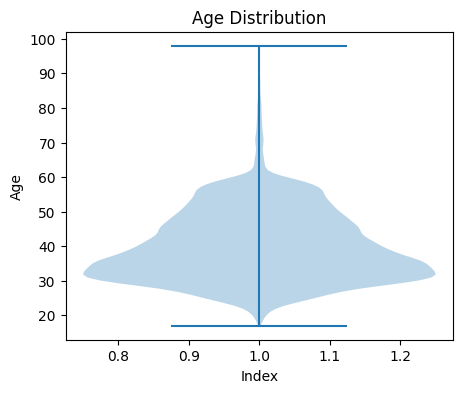

In [9]:
# Age distribution 
plt.figure(figsize=(5,4))
plt.violinplot(df_copy['age'])
plt.title('Age Distribution')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

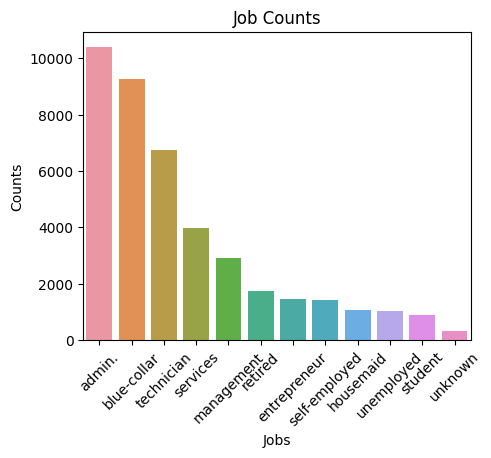

In [10]:
# Count the unique values of jobs column
job_counts = df_copy['job'].value_counts()
df_counts = job_counts.reset_index()
df_counts.columns = ['job', 'count']
plt.figure(figsize=(5,4))
sns.barplot(data=df_counts, x='job',y='count')
plt.title("Job Counts")
plt.xlabel("Jobs")
plt.ylabel("Counts")
plt.xticks(rotation=45)  
plt.show()

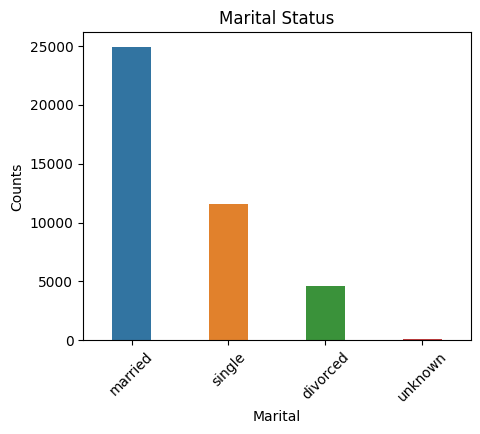

In [11]:
# Count the unique values of marital status
maritals = df_copy['marital'].value_counts()
marital_status = maritals.reset_index()
marital_status.columns = ['marital_status', 'count']
plt.figure(figsize=(5,4))
sns.barplot(data=marital_status, x='marital_status',y='count',width=0.4)
plt.title("Marital Status")
plt.xlabel("Marital")
plt.ylabel("Counts")
plt.xticks(rotation=45)  
plt.show()

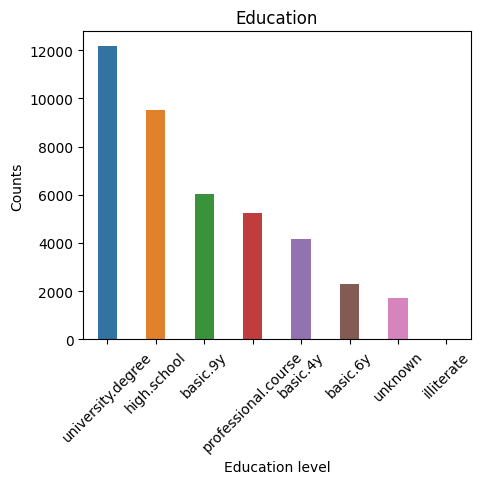

In [12]:
# Count the unique values of education 
edu = df_copy['education'].value_counts()
edu_counts = edu.reset_index()
edu_counts.columns = ['edu', 'count']
plt.figure(figsize=(5,4))
sns.barplot(data=edu_counts, x='edu',y='count',width=0.4)
plt.title("Education")
plt.xlabel("Education level")
plt.ylabel("Counts")
plt.xticks(rotation=45)  
plt.show()

In [13]:
# Conversion of categorical data to numeric using label encoder
le = preprocessing.LabelEncoder()
df_copy["job"] = le.fit_transform(df_copy["job"])
df_copy["marital"] = le.fit_transform(df_copy["marital"])
df_copy["education"] = le.fit_transform(df_copy["education"])
df_copy["default"] = le.fit_transform(df_copy["default"])
df_copy["housing"] = le.fit_transform(df_copy["housing"])
df_copy["loan"] = le.fit_transform(df_copy["loan"])
df_copy["contact"] = le.fit_transform(df_copy["contact"])
df_copy["month"] = le.fit_transform(df_copy["month"])
df_copy["day_of_week"] = le.fit_transform(df_copy["day_of_week"])
df_copy["poutcome"] = le.fit_transform(df_copy["poutcome"])
df_copy["y"] = le.fit_transform(df_copy["y"])

In [14]:
df_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [15]:
# Check the correlation between features 
correlation_matrix = df_copy[['emp.var.rate', 'nr.employed']].corr(numeric_only=True)
correlation = correlation_matrix.loc['emp.var.rate', 'nr.employed']
correlation_matrix

,emp.var.rate,nr.employed
emp.var.rate,1.00000,0.90697
nr.employed,0.90697,1.00000


Text(0.5, 1.0, 'emp.var.rate and nr.employed')

<Figure size 500x300 with 0 Axes>

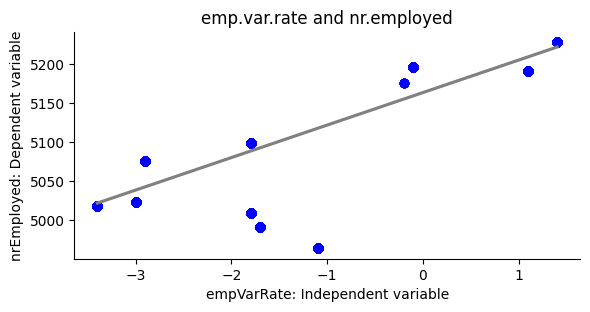

In [16]:
# Plot the two above features which are highly correlated with each other
plt.figure(figsize=(5,3))
sns.lmplot(x='emp.var.rate',y='nr.employed',data=df_copy,aspect=2,height=3,scatter_kws={'color': 'blue'},
           line_kws={'color': 'gray'})
plt.xlabel('empVarRate: Independent variable')
plt.ylabel('nrEmployed: Dependent variable')
plt.title('emp.var.rate and nr.employed')

In [17]:
# For linear regression, these two features are used as they represent continuos variable 
# X is considered as independent var and y as dependent variable
X = df_copy[["emp.var.rate"]]
y = df_copy["nr.employed"]
#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Fit data to the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
#Make prediction using model
y_pred = linear_regressor.predict(X_test)
#Evaluate the performance of data
mse= mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Mean squared error: 896.52
R-squared: 0.82


### Note:

#### The cause of a high value for Mean Squared Error could be several following cases:
*   Due to small amount of data set (underfitting occurs) or large amount of dataset (Overfitting occurs) which leads to a high MSE. There is all about model complexity that could be take care of that with types of regularize and lets try it in the next step.
*   If there exists Missing values or outliers it could be the reason for high MSE, but as it is already checked at the beginning which there is not any NaN values; therefore, the problem might be something else. And also the data has been normalized with standard scaler.

*   Another option is using from cross validation instead of train_test split and evaluate model's average performance accross different train-test set.





### L1 and L2 Regularizers (Lasso and Ridge Regression)

In [18]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [19]:
pipe_l1 = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
pipe_l2 = make_pipeline(StandardScaler(), Ridge(alpha=0.1))
pipe_lr = make_pipeline(StandardScaler(), LinearRegression())

# Perform cross-validation and calculate mean squared error (MSE)
mse_l1 = -np.mean(cross_val_score(pipe_l1, X, y, scoring='neg_mean_squared_error', cv=10))
mse_l2 = -np.mean(cross_val_score(pipe_l2, X, y, scoring='neg_mean_squared_error', cv=10))
#mse_lr = -np.mean(cross_val_score(pipe_lr, X, y, scoring='neg_mean_squared_error', cv=10))

print("MSE (L1 Regularization):", mse_l1)
print("MSE (L2 Regularization):", mse_l2)
#print("MSE (Linear Regression):", mse_lr)

MSE (L1 Regularization): 1190.1211854003648
MSE (L2 Regularization): 1189.4582415065101


### Note:
 * After ttrying different alpha for regularization [0.001, 0.1,0.2, 0.3, 0.4, 0.5], and cross validation 5, 10, 20, and 30, still it generates high MSE.

*   One of the possiblity is that it depends on dataset and how the indep variable does effect on dep variables. And it could implemented by another types of model.


*   Lets try with another model!






In [20]:
Lasso=pipe_l1.fit(X_train,y_train)
Lasso

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1))])

In [21]:
Ridge=pipe_l2.fit(X_train,y_train)
Ridge

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])

In [22]:
y_pred=Lasso.predict(X_test)
mse_lasso= mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
y_pred=Ridge.predict(X_test)
mse_ridge= mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
print("Mean squared error of Lasso: {:.2f}".format(mse_lasso))
print("R-squared of Lasso: {:.2f}".format(r2_lasso))
print("Mean squared error of Ridge: {:.2f}".format(mse_ridge))
print("R-squared of Ridge: {:.2f}".format(r2_ridge))

Mean squared error of Lasso: 896.39
R-squared of Lasso: 0.82
Mean squared error of Ridge: 896.52
R-squared of Ridge: 0.82


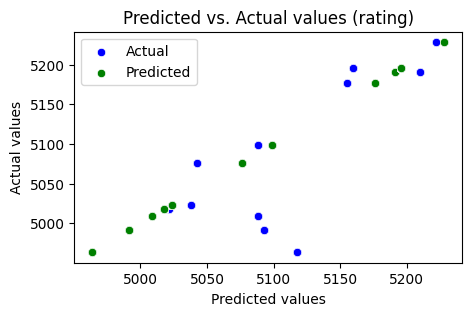

In [23]:
# Plot actual and predited values for the Linear regression
plt.figure(figsize=(5,3))
ypred=Ridge.predict(X)
sns.scatterplot(x=ypred, y=y,color='blue',alpha=1.0,label='Actual')
sns.scatterplot(x=y, y=y,color='green', alpha=1.0,label='Predicted')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs. Actual values (rating)")
plt.legend()
plt.show()

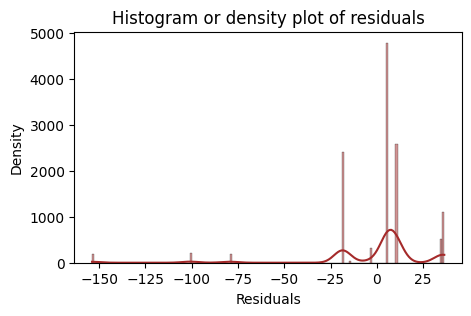

In [24]:
# Create a histogram or density plot of the residuals
residuals = y_test - y_pred
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True,color='brown')
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram or density plot of residuals")
plt.show()

### A residual plot shows the difference between the actual target variable and the predicted values (Residuals) on the y-axis and the predicted values on the x-axis.
* In a well-fitted model, the residuals should be randomly scattered around the horizontal zero line, indicating that the model captures the underlying patterns in the data.

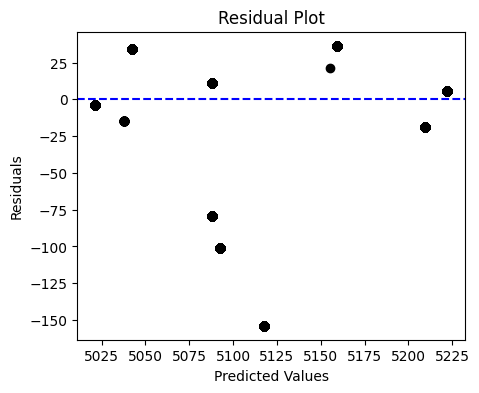

In [25]:
residuals = y_test - y_pred
# Create the residual plot
plt.figure(figsize=(5,4))
plt.scatter(y_pred, residuals,color='black')
plt.axhline(y=0, color='blue', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# **Logisitic Regression**

#### Import libraries:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns

#### Split train and test data:

In [27]:
#Split the train and test data 
Xtrain, Xtest, ytrain, ytest =  train_test_split(df_copy.drop('y',axis=1),
                                                    df_copy['y'],
                                                    test_size=.3, random_state = 42,
                                                    stratify= df_copy['y'])

scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)
Xtrain = pd.DataFrame(Xtrain, columns=df_copy.drop('y',axis=1).columns)
Xtest = pd.DataFrame(Xtest, columns=df_copy.drop('y',axis=1).columns)
#Fit the model 
logreg = LogisticRegression(random_state=34)
logreg.fit(Xtrain, ytrain)
#Make prediction
ypred = logreg.predict(Xtest)

#### Confusion matrix:

In [28]:
cnf_matrix = metrics.confusion_matrix(ytest, ypred)
cnf_matrix

array([[10732,   233],
       [  871,   521]])

Text(0.5, 357.55555555555554, 'Predicted label')

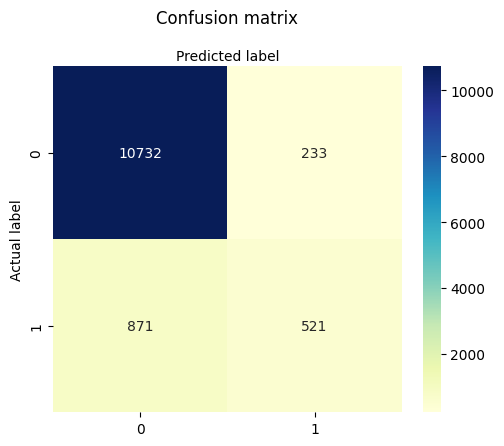

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(5,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
target_names = ['Subscribed', 'Not Subscribed']
print(classification_report(ytest, ypred, target_names=target_names))

                precision    recall  f1-score   support

    Subscribed       0.92      0.98      0.95     10965
Not Subscribed       0.69      0.37      0.49      1392

      accuracy                           0.91     12357
     macro avg       0.81      0.68      0.72     12357
  weighted avg       0.90      0.91      0.90     12357



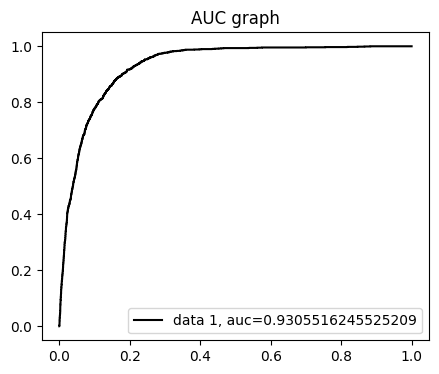

In [31]:
ypred_proba = logreg.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  ypred_proba)
auc = metrics.roc_auc_score(ytest, ypred_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='black')
plt.legend(loc=4)
plt.title('AUC graph')
plt.show()

### Hyper_parameter tuning for Logistic Regression

In [32]:
import warnings
warnings.filterwarnings("ignore")
logReg= LogisticRegression(max_iter=1000)
# Define the hyperparameter tuning
params = {
    'penalty': ['l1','l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg','sag', 'saga']}     #Newton's conjugate gradient , #Stochastic Average Gradient , and extend of sag
# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(logReg, params, cv=5)
grid_search.fit(Xtrain, ytrain)
best_params = grid_search.best_params_
# Create a new logistic regression model with the best hyperparameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(Xtrain, ytrain)
ypred = best_logreg.predict(Xtest)
# Compute the mean squared error and r2 score
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
val_score = best_logreg.score(Xtrain, ytrain)
test_score = best_logreg.score(Xtest, ytest)
print("Mean Squared Error with best param LogReg :", mse)
print("Validation Score:", val_score)
print("Test Score:", test_score)

Mean Squared Error with best param LogReg : 0.08950392490086591
Validation Score: 0.9102008255003295
Test Score: 0.9104960750991341


In [33]:
f1 = classification_report(ytest, ypred)
auc = metrics.roc_auc_score(ytest, ypred)
precision = classification_report(ytest, ypred)
recall = classification_report(ytest, ypred)
# Print the evaluation metrics
print("F1 Score LogReg:", f1)
print("AUC LogReg:", auc)
print("Mean Squared Error with best param LogReg :", mse)
print("Validation Score LogReg:", val_score)
print("Test Score LogReg:", test_score)

F1 Score LogReg:               precision    recall  f1-score   support

           0       0.93      0.98      0.95     10965
           1       0.67      0.40      0.50      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

AUC LogReg: 0.6864599548720851
Mean Squared Error with best param LogReg : 0.08950392490086591
Validation Score LogReg: 0.9102008255003295
Test Score LogReg: 0.9104960750991341


# **KNN Regression**

### Import libraries:

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
#Fit model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(Xtrain, ytrain)
#Make prediction
ypred_knn = knn.predict(Xtest)
#Calculate MSE
mse = mean_squared_error(ytest, ypred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.08950392490086591


### Plot the residuals:

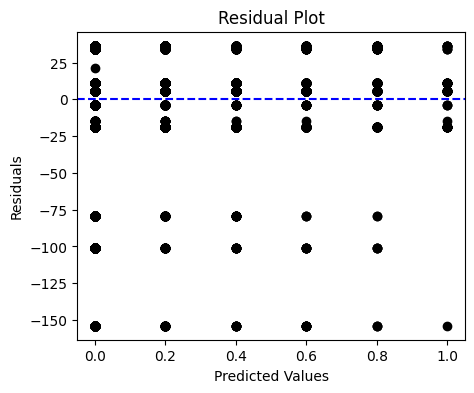

In [36]:
residuals_knn = ytest - ypred_knn
plt.figure(figsize=(5,4))
plt.scatter(ypred_knn, residuals,color='black')
plt.axhline(y=0, color='blue', linestyle='--') 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

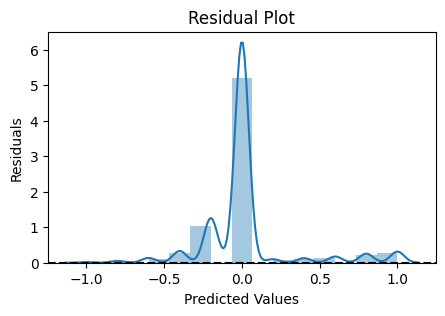

In [37]:
import warnings
warnings.filterwarnings("ignore")
residuals_knn = ytest - ypred_knn
plt.figure(figsize=(5,3))
sns.distplot(residuals_knn,bins=15)
#plt.scatter(ypred_knn, residuals_knn,color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

<Axes: xlabel='y', ylabel='Density'>

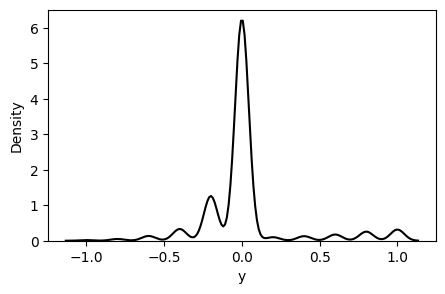

In [38]:
plt.figure(figsize=(5,3))
sns.distplot(residuals_knn, hist=False,color='black')

### Hyper_parameter tuning for KNN_Regressor

In [50]:
from sklearn.metrics import mean_squared_error, f1_score, recall_score, roc_auc_score
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
    }
knn = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(Xtrain, ytrain)
best_params = grid_search.best_params_
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(Xtrain, ytrain)
ypred = best_knn.predict(Xtest)
best_knn1 = KNeighborsRegressor(**best_params) # This is for the two features only which we have use it for the LinearReg at the first
best_knn1.fit(X_train, y_train)
ypredKR = best_knn1.predict(X_test)
print("Mean Squared Error (MSE) for hyperparameterized knnReg:", mean_squared_error(ytest, ypred))
print("Score (r2) for hyperparameterized knnReg:", r2_score(y_test, ypredKR))

Mean Squared Error (MSE) for hyperparameterized knnReg: 0.07973998047871736
Score (r2) for hyperparameterized knnReg: 0.9743054174054273


# **Decision Tree**

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

In [60]:
# Create the decision tree classifier
dt = DecisionTreeClassifier()
# Train the model on the training data
dt.fit(Xtrain, ytrain)
# Make predictions
ypred = dt.predict(Xtest)
# Calculate the accuracy of the model
accuracy = accuracy_score(ytest, ypred)
print("Accuracy DT:", accuracy)
# Generate the classification report
report = classification_report(ytest, ypred)
print("Classification Report:")
print(report)

Accuracy DT: 0.8890507404709881
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10965
           1       0.51      0.51      0.51      1392

    accuracy                           0.89     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



#### Plot Residuals

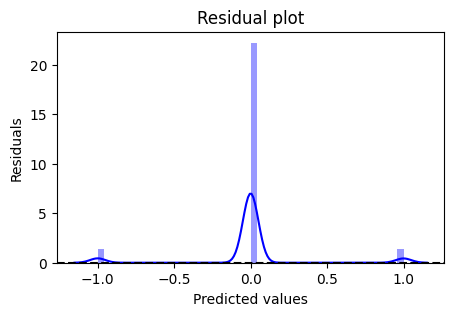

In [61]:
residuals_dt= ytest - ypred
plt.figure(figsize=(5,3))
sns.distplot(residuals_dt,color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

<Axes: xlabel='y', ylabel='Density'>

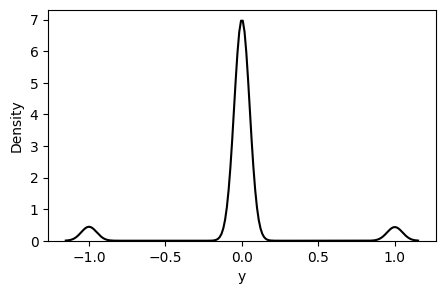

In [62]:
plt.figure(figsize=(5,3))
sns.distplot(residuals_dt, hist=False,color='black')

<Axes: xlabel='y', ylabel='Count'>

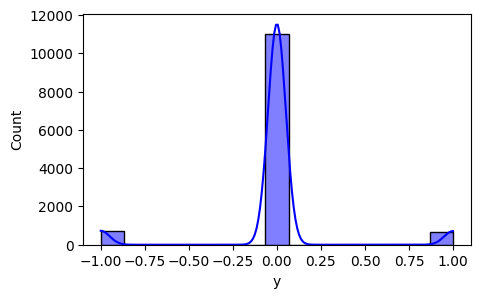

In [63]:
plt.figure(figsize=(5,3))
sns.histplot(residuals_dt, kde=True,color='blue')

### Hyper_parameter tunning for DecisionTree Classifier

In [56]:
param_grid = {
    'max_depth': [3, 5, 7],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(Xtrain, ytrain)
best_params = grid_search.best_params_
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(Xtrain, ytrain)
ypred = best_dt.predict(Xtest)

# Calculate evaluation metrics
mse = mean_squared_error(ytest, ypred)
classification_report = classification_report(ytest, ypred)
auc = roc_auc_score(ytest, ypred)
print("Mean Squared Error (MSE) for DT hyperparameter:", mse)
print("Classification Report for DT hyperparameter:")
print(classification_report)
print("AUC of DT hyperparameter:", auc)

Mean Squared Error (MSE) for DT hyperparameter: 0.08481022901998866
Classification Report for DT hyperparameter:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.66      0.50      0.57      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.76     12357
weighted avg       0.91      0.92      0.91     12357

AUC of DT hyperparameter: 0.7358305030111484


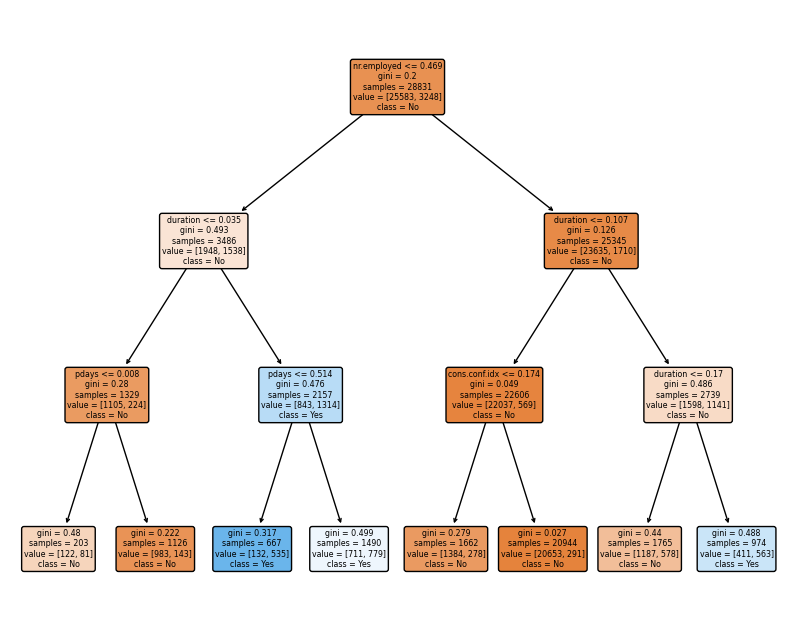

In [57]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt.fit(Xtrain, ytrain)
# Plot the decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(dt, feature_names=df_copy.drop('y',axis=1).columns, class_names=['No', 'Yes'], filled=True,rounded=True)
plt.show()

# **RandomForest**

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [71]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(Xtrain, ytrain)
ypred = rf_classifier.predict(Xtest)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
residualsRF = ytest - ypred
# Print MSE 
print("Mean Squared Error (MSE) for RF:", mse)

Mean Squared Error (MSE) for RF: 0.08270615845269888


In [74]:
accuracy = accuracy_score(ytest, ypred)
print("Accuracy RF:", accuracy)

Accuracy RF: 0.9172938415473011


### Plot the Residuals

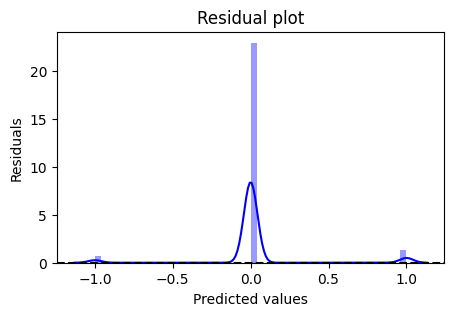

In [72]:
# Plot residuals
plt.figure(figsize=(5,3))
sns.distplot(residualsRF,color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

<Axes: xlabel='y', ylabel='Density'>

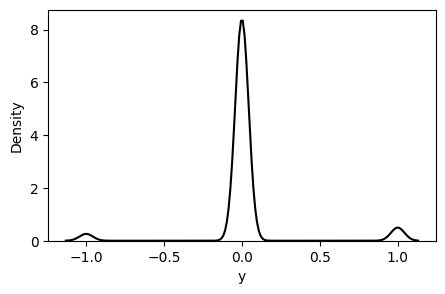

In [73]:
plt.figure(figsize=(5,3))
sns.distplot(residualsRF, hist=False,color='black')

### Hyper_parameter tunning for RandomForest

In [75]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(Xtrain, ytrain)
best_params = grid_search.best_params_
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(Xtrain, ytrain)
ypred = best_rf_classifier.predict(Xtest)
# Calculate evaluation metrics
mse = mean_squared_error(ytest, ypred)
classification_report = classification_report(ytest, ypred)
auc = roc_auc_score(ytest, ypred)
# Print the evaluation metrics
print("Mean Squared Error (MSE) for hyperparameter RF:", mse)
print("Classification Report for hyperparameter RF:")
print(classification_report)
print("AUC for hyperparameter RF:", auc)

Mean Squared Error (MSE) for hyperparameter RF: 0.09047503439346119
Classification Report for hyperparameter RF:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10965
           1       0.75      0.29      0.42      1392

    accuracy                           0.91     12357
   macro avg       0.83      0.64      0.69     12357
weighted avg       0.90      0.91      0.89     12357

AUC for hyperparameter RF: 0.6407549687878359


# Find the best model

In [77]:
models = [best_logreg,
          best_knn,
          best_dt,
          best_rf_classifier
          ]

names = [ 
          'LogisticRegression with Hyper_Parameter Tunning',
          'KNeighborsRegressor with Hyper_Parameter Tunning',
          'DecisionTreeClassifier with Hyper_Parameter Tunning',
          'RandomForestClassifier with Hyper_Parameter Tunning'
          ]

for model,name in zip(models,names):
    m = model.fit(Xtrain,ytrain)
    ypred = m.predict(Xtest)
    print(name, 'report:')
    print('Train score',model.score(Xtrain,ytrain))
    print('Test score',model.score(Xtest,ytest))
    print()
    print('*'*50)

LogisticRegression with Hyper_Parameter Tunning report:
Train score 0.9102008255003295
Test score 0.9104960750991341

**************************************************
KNeighborsRegressor with Hyper_Parameter Tunning report:
Train score 0.38703106102141205
Test score 0.2022728979322279

**************************************************
DecisionTreeClassifier with Hyper_Parameter Tunning report:
Train score 0.9165828448544969
Test score 0.9151897709800113

**************************************************
RandomForestClassifier with Hyper_Parameter Tunning report:
Train score 0.916235995976553
Test score 0.9099295945617868

**************************************************


## Result:
* Based on the above comparison of models, it shows that Decision Tree Classifer are well-fitted and perform better than other models for the BankMarketing dataset.
* DTs are known for their interpretability and ability to deal with complex relationship wihting the data and they can handle both categorical and numerical features.
* BankMarketing dataset is also mixed of categorical and numerical features, so in here based on the hyperparameter setting; DT came with better performance than other models.